In [154]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [107]:
# Criação das tabelas de train e test (desnecessário! O train_test_split já faz isso!)
train = []
while True:
    number = np.random.randint(len(fruits))
    if number in train:
        pass
    else:
        train.append(number)
        if len(train) == (int(len(fruits)/2)):           
            break
    
test = []

for i in range(len(fruits)):
    if i in train:
        pass
    else:
        test.append(i)
    
display(fruits.iloc[train,:])

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
34,3,orange,turkey_navel,142,7.6,7.8,0.75
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
39,3,orange,turkey_navel,144,6.8,7.4,0.75
35,3,orange,turkey_navel,150,7.1,7.9,0.75
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70
20,1,apple,cripps_pink,160,7.5,7.5,0.86
7,2,mandarin,mandarin,76,5.8,4.0,0.81
17,1,apple,golden_delicious,168,7.5,7.6,0.73


In [108]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


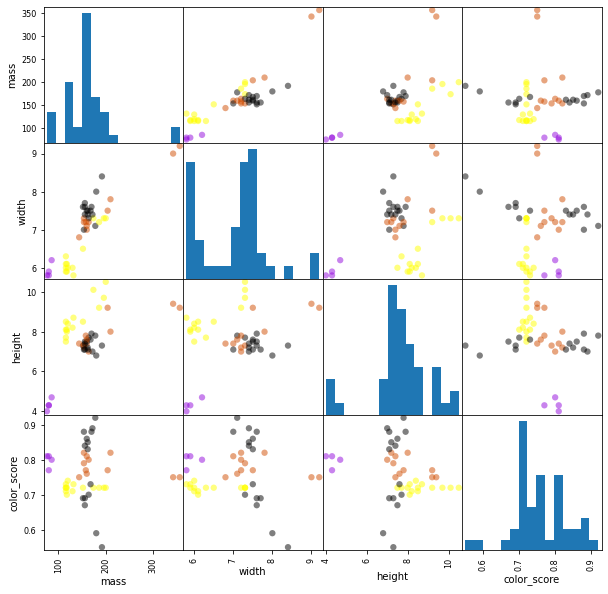

In [196]:
X = fruits[['mass','width','height', 'color_score']] 
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)


from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, hist_kwds={'bins':15}, marker='o', s=40, figsize=(10,10), cmap=cmap)